In [1]:
# In Class Lab 9 Template
# Cosmological Tools

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
# Define the benchmark cosmology at z = 0
# Planck 2015 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM = 0.308   # Matter Density Parameter
OmegaR = 8.24e-5  # Radiation Density Parameter
OmegaL = 0.692  # Dark Energy Density Parameter
h = 0.6781   # Hubble Constant  100 h km/s/Mpc
        

In [42]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM, OmegaR, OmegaL, h):
        # initialize the instance of the class - for any given Cosmology
        # Input:    Omega M matter density parameter
        #           Omega R radiation density parameter
        #           Omega L  dark energy density parameter
        #           h  normalization for the hubble parameter
        
        # initialize the cosmology
        self.OmegaM = OmegaM # Matter Density Parameter
        self.OmegaR = OmegaR  # Radiation Density Parameter
        self.OmegaL = OmegaL  # Dark Energy Density Parameter
        self.OmegaK = 1.0 - (OmegaM + OmegaR + OmegaL) # Curvature Density Parameter
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    # Question 1 A)
    def HubbleParameterZ(self, z):
        # Function that defines the Hubble Parameter as a function of redshift
        # Input:   Redshift z 
        # Returns: The Hubble parameter at the given redshift in units of km/s/Mpc        
        inbracket = self.OmegaM*(1+z)**3+self.OmegaR*(1+z)**4+self.OmegaL+self.OmegaK*(1+z)**2
        Hz2 = self.Ho**2*inbracket
        return np.sqrt(Hz2)
    
 
    # Question 2 A)
    def OmegaM_Z(self,z):
        # Function that defines the matter density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Matter Density Parameter at the given redshift.
        H_ratio = self.HubbleParameterZ(0)/self.HubbleParameterZ(z)
        omega = self.OmegaM*(1+z)**3*H_ratio**2
        return omega
    
    def OmegaR_Z(self,z):
        # Function that defines the radiation density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Radiation Density Parameter at the given redshift.
        
        H_ratio = self.HubbleParameterZ(0)/self.HubbleParameterZ(z)
        omega = self.OmegaR*(1+z)**4*H_ratio**2
        return omega
    
    
    def OmegaL_Z(self,z):
        # Function that defines the dark energy density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Dark Energy Density Parameter at the given redshift.
        
        H_ratio = self.HubbleParameterZ(0)/self.HubbleParameterZ(z)
        omega = self.OmegaL*H_ratio**2
        return omega
  
    

In [43]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology
CT = CosmologicalTools(OmegaM, OmegaR, OmegaL, h)

In [44]:
# Question 1 B) 

# Test Hubble Parmeter at z = 0
CT.HubbleParameterZ(0)

<Quantity 67.81 km / (Mpc s)>

In [45]:
# Question 1 C) 

# Compute the Hubble Parameter at z = 1 in BenchMark Cosmology
CT = CosmologicalTools(OmegaM, OmegaR, OmegaL, h)
CT.HubbleParameterZ(1)

<Quantity 120.48424622 km / (Mpc s)>

In [46]:
# Question 1 D) 
# Define the cosmology for the Einstein De Sitter Universe
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same

# Define a New Instance of the Class with Einstein De Sitter Cosmology 
CTD = CosmologicalTools(OmegaMD, OmegaRD, OmegaLD, h)

# Compute the Hubble Parameter at z = 1.0 in Einstein De Sitter Cosmology
CTD.HubbleParameterZ(1)

<Quantity 191.79564333 km / (Mpc s)>

# Question 1 D) 
Is the recession velocity for a galaxy at a given distance expected to be larger or smaller in Einstein De Sitter vs the Benchmark cosmology at z=1?
Much larger

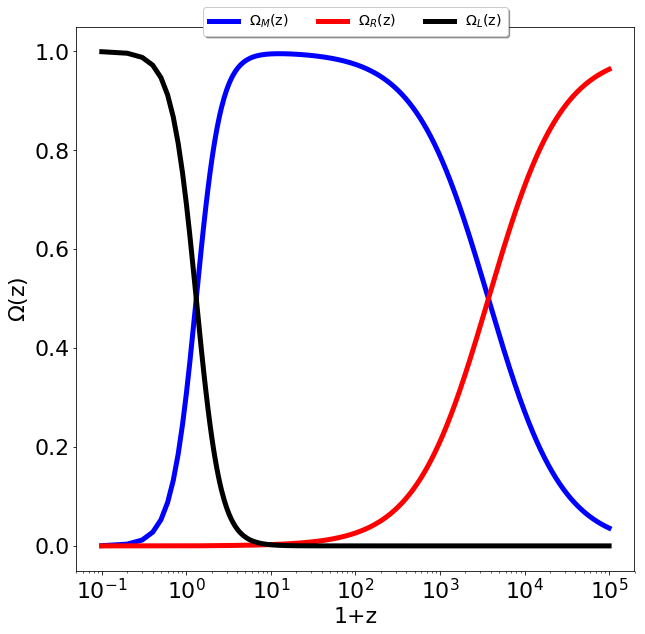

In [47]:
# Question 2 B) 


# Plot the Redshift Evolution of OmegaM, OmegaR and OmegaL
############################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Define an array of redshift 
zmax = 10**5
zmin = -0.9
zrange = np.arange(zmin, zmax, 0.1)

omega_m = CT.OmegaM_Z(zrange)
omega_r = CT.OmegaR_Z(zrange)
omega_l = CT.OmegaL_Z(zrange)

# Evolution of Matter Density Parameter as a function of 1+z
# FILL THIS IN
plt.semilogx(zrange+1, omega_m  , color='blue', linewidth=5, label=r'$\Omega_M$(z)')

# Evolution of Radiation Density Parameter 
# FILL THIS IN 
plt.semilogx(zrange+1, omega_r  , color='red', linewidth=5, label=r'$\Omega_R$(z)')

# Evolution of Dark Energy Density Parameter 
# FILL THIS IN
plt.semilogx(zrange+1, omega_l  , color='black', linewidth=5, label=r'$\Omega_L$(z)')




# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel(r'$\Omega$(z)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


legend = ax.legend(loc='upper center', fontsize='x-large', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)

# Save to a file
ax.set_rasterized(True)
plt.savefig('DensityParameterEvolution.eps', rasterized=True, dpi=350)

# Question 2 C) 

 At what approximate redshift does Radiation Density dominate?

 

 At what approximate redshift does Dark Energy dominate?   

